# 2.0 Data Loading

In [1]:
! pip install imbalanced-learn

! pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Read All Files

# 3.0 Data Cleaning

In [2]:
import boto3
import pandas as pd
from io import BytesIO

# Konfigurasi MinIO
endpoint = "https://4892-103-94-190-24.ngrok-free.app"  # Ganti dengan endpoint MinIO Anda
access_key = "minioadmin"
secret_key = "minioadmin"
bucket_name = "ecomm-bucket"
folder_path = "batches/"  # Path folder tempat file batch berada

# Koneksi ke MinIO
s3 = boto3.client('s3', endpoint_url=endpoint, aws_access_key_id=access_key, aws_secret_access_key=secret_key)

# Dapatkan daftar file di folder
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)
file_keys = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.csv')]

# Gabungkan semua file CSV ke dalam satu DataFrame
dataframes = []
for file_key in file_keys:
    # Baca setiap file CSV dari MinIO
    response = s3.get_object(Bucket=bucket_name, Key=file_key)
    csv_data = pd.read_csv(BytesIO(response['Body'].read()))
    dataframes.append(csv_data)

# Gabungkan semua DataFrame
dfasli = pd.concat(dataframes, ignore_index=True)

# Analisis Ringkasan Data
data_summary = pd.DataFrame({})
data_summary['datasets'] = ["combined_batches"]
data_summary['columns'] = [', '.join(dfasli.columns)]
data_summary['total_rows'] = [dfasli.shape[0]]
data_summary['total_cols'] = [dfasli.shape[1]]
data_summary['total_duplicate'] = [len(dfasli[dfasli.duplicated()])]
data_summary['total_null'] = [dfasli.isnull().sum().sum()]
data_summary['null_cols'] = [', '.join([col for col, null in dfasli.isnull().sum().items() if null > 0])]



In [3]:
import boto3
import pandas as pd
from io import BytesIO

# Konfigurasi MinIO
endpoint = "https://4892-103-94-190-24.ngrok-free.app"  # Ganti dengan endpoint MinIO Anda
access_key = "minioadmin"
secret_key = "minioadmin"
bucket_name = "ecomm-bucket"
folder_path = "batches/"  # Path folder tempat file batch berada

# Koneksi ke MinIO
s3 = boto3.client('s3', endpoint_url=endpoint, aws_access_key_id=access_key, aws_secret_access_key=secret_key)

# Dapatkan daftar file di folder
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=folder_path)
file_keys = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.csv')]

# Gabungkan semua file CSV ke dalam satu DataFrame
dataframes = []
for file_key in file_keys:
    # Baca setiap file CSV dari MinIO
    response = s3.get_object(Bucket=bucket_name, Key=file_key)
    csv_data = pd.read_csv(BytesIO(response['Body'].read()))
    dataframes.append(csv_data)

# Gabungkan semua DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Analisis Ringkasan Data
data_summary = pd.DataFrame({})
data_summary['datasets'] = ["combined_batches"]
data_summary['columns'] = [', '.join(df.columns)]
data_summary['total_rows'] = [df.shape[0]]
data_summary['total_cols'] = [df.shape[1]]
data_summary['total_duplicate'] = [len(df[df.duplicated()])]
data_summary['total_null'] = [df.isnull().sum().sum()]
data_summary['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0])]



### 3.1 Merging All Dataframes

### Show All Features

In [4]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [5]:
df.shape

(55000, 40)

#### Check duplicates

In [6]:
df.duplicated().sum()

2502

In [7]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,55000.000000,54530.000000,54639.000000,54639.000000,54639.000000,53810.000000,53810.000000,53810.000000,54638.000000,54638.000000,54638.000000,54638.000000,54997.000000,54997.000000,54997.000000,54639.000000
mean,34976.788891,4.006143,1.197661,120.442487,20.121993,48.711857,781.637502,2.192957,2112.934441,30.298785,16.593744,23.129617,1.105879,2.936324,173.898179,24463.096927
std,29752.555616,1.407356,0.688195,186.208363,15.863770,10.069359,647.828763,1.706990,3794.208677,16.376655,13.486561,11.941903,0.833560,2.776400,289.710641,27524.425682
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11420.000000,3.000000,1.000000,39.900000,13.080000,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.720000,6440.000000
50%,24240.000000,5.000000,1.000000,74.900000,16.290000,52.000000,597.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,107.900000,13660.000000
75%,58103.000000,5.000000,1.000000,134.570000,21.230000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,190.620000,29032.000000
max,99990.000000,5.000000,20.000000,6735.000000,339.590000,72.000000,3985.000000,19.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    55000 non-null  object 
 1   customer_unique_id             55000 non-null  object 
 2   customer_zip_code_prefix       55000 non-null  int64  
 3   customer_city                  55000 non-null  object 
 4   customer_state                 55000 non-null  object 
 5   order_id                       55000 non-null  object 
 6   order_status                   55000 non-null  object 
 7   order_purchase_timestamp       55000 non-null  object 
 8   order_approved_at              54917 non-null  object 
 9   order_delivered_carrier_date   54078 non-null  object 
 10  order_delivered_customer_date  53435 non-null  object 
 11  order_estimated_delivery_date  55000 non-null  object 
 12  review_id                      54530 non-null 

### 3.2 Handling Missing Values

In [9]:
# Number of Missing Values for the first half of features

df.isna().sum()[:20]

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   83
order_delivered_carrier_date       922
order_delivered_customer_date     1565
order_estimated_delivery_date        0
review_id                          470
review_score                       470
review_comment_title             48514
review_comment_message           31820
review_creation_date               470
review_answer_timestamp            470
order_item_id                      361
product_id                         361
dtype: int64

##### Drop All Missing Values in datetime columns

In [10]:
print(df.isnull())

       customer_id  customer_unique_id  customer_zip_code_prefix  \
0            False               False                     False   
1            False               False                     False   
2            False               False                     False   
3            False               False                     False   
4            False               False                     False   
...            ...                 ...                       ...   
54995        False               False                     False   
54996        False               False                     False   
54997        False               False                     False   
54998        False               False                     False   
54999        False               False                     False   

       customer_city  customer_state  order_id  order_status  \
0              False           False     False         False   
1              False           False     False         

In [11]:
df = df.dropna()
print(df.isnull())

       customer_id  customer_unique_id  customer_zip_code_prefix  \
9            False               False                     False   
10           False               False                     False   
11           False               False                     False   
12           False               False                     False   
13           False               False                     False   
...            ...                 ...                       ...   
54912        False               False                     False   
54913        False               False                     False   
54916        False               False                     False   
54971        False               False                     False   
54998        False               False                     False   

       customer_city  customer_state  order_id  order_status  \
9              False           False     False         False   
10             False           False     False         

In [12]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### Keep " review_comment_message " & " review_comment_title "  Features ( Will be handled later )

In [13]:
# Number of Missing Values for the Second half of features

df.isna().sum()[20:]

seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
dtype: int64

##### Check the missing values

In [14]:
df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [15]:
# # Since all the missing values are in the same raw, we will drop this raw
# df.drop(27352, inplace=True)

# # Reset Index
# df.reset_index(inplace= True, drop= True)

### 3.3 Feature Engineering

##### Classify Products Categories (71) into 9 main Categories

In [16]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [17]:
df.product_category.value_counts()

product_category
Electronics                1521
Furniture                  1253
Home & Garden               728
Beauty & Health             652
Entertainment               489
Fashion                     376
Books & Stationery          132
Industry & Construction     122
Food & Drinks                62
Name: count, dtype: int64

##### Combine Width, Height and Length to get Product Volume

In [18]:
# Create Volume Column
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

# Drop Width, Height and Length
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

#### Convert Datetime features from Object to Datetime

In [19]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

##### Extract duration of estimated shipping from purchasing date untill estimated delivery date

In [20]:
df['estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days


##### Extract duration of shipping from purchasing date until delivered to customer date

In [21]:
df['arrival_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


##### Extract duration of shipping from purchasing carrier delivered date untill delivered to customer

In [22]:
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

##### Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"

In [23]:
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##### Shipping status from Seller to Carrier

In [24]:
# First get seller to carrier duration in days
df['seller_to_carrier_status'] = (df['shipping_limit_date'] - df['order_delivered_carrier_date']).dt.days

# Now classify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')


##### Shipping status from Carrier to Customer

In [25]:
# First get difference between estimated delivery date and actual delivery date in days
df['arrival_status'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# Now classify the duration into 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')


#### Show statistics of new Features

In [26]:
df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,5335.000000,5335.000000,5335.000000
mean,22.314527,9.971509,7.115089
std,10.254159,7.958880,7.134039
min,2.000000,1.000000,0.000000
25%,15.000000,5.000000,3.000000
50%,22.000000,8.000000,6.000000
75%,29.000000,12.000000,8.000000
max,69.000000,88.000000,69.000000


#### Remove Outliers in both features ( More than 60 days )

In [27]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated delivery time

In [28]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)

df['arrival_delivery_rate'] = df.arrival_days.apply(rates)

df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

# 4.0 Exploratory Data Analysis ( EDA ) 

In [29]:
df.drop('order_status', axis=1, inplace=True)

### Which Cities have highest Revenue ?

### Are Transactions done with Vouchers lead to high review score ?

In [30]:
# Create copy of DataFrame
df_2 = df.copy()

# Save sample for EDA Deployment
EDA_df = df_2.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'product_category_name'], axis= 1)
EDA_sample = EDA_df.sample(frac= 1)[:10000]
EDA_sample.to_csv('EDA.csv')

# 5.0 Data Preprocessing

### 5.1 Drop Unneccessary Features

In [31]:
# Drop all ids, zip codes, datetimes, review comment and title, product length

df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

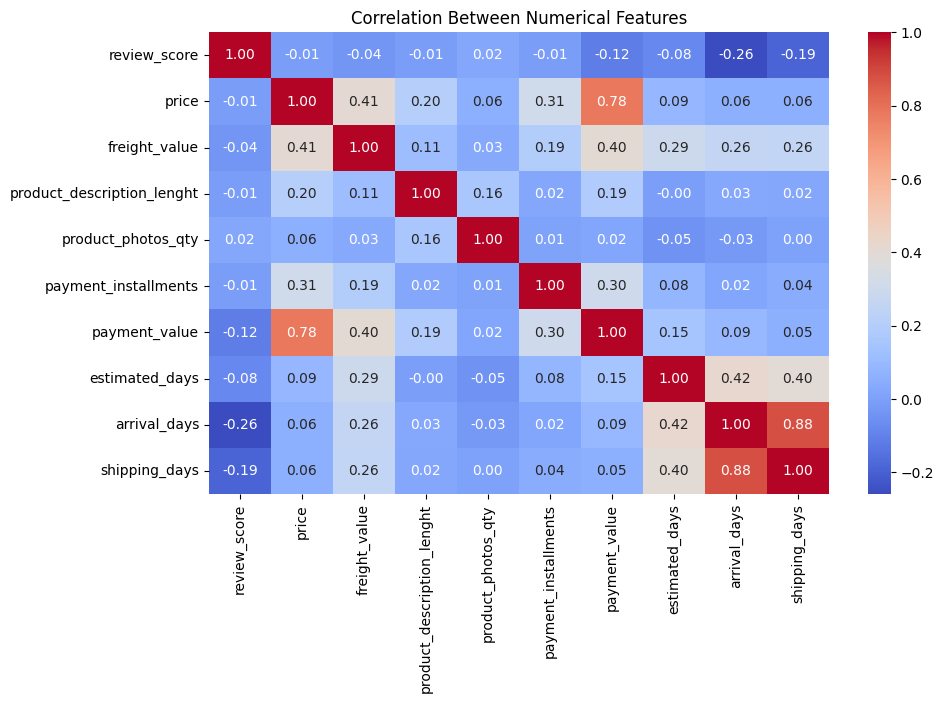

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=[10, 6])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


In [33]:
# Remove features with high correlations
df.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [34]:
df.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,1.0,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
1,1.0,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,1.0,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,1.0,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
4,1.0,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast


#### Convert Review Score from Multiclass to Binary

In [35]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

#### Split Data into Input Features & Target Variable

In [36]:
X = df.drop('review_score', axis=1)
y = df['review_score']

### 5.2 Handling Categorical Features

#### Handling Ordinal Features ( Label Encoding)

In [37]:
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

#### Handling Nominal Features ( One Hot Encoding )

In [38]:
X = pd.get_dummies(X, drop_first=True)

#### Split Data into Train & Test

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

### 5.3 Feature Selection

In [40]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

##### Plotting Featres as per importance

<AxesSubplot: >

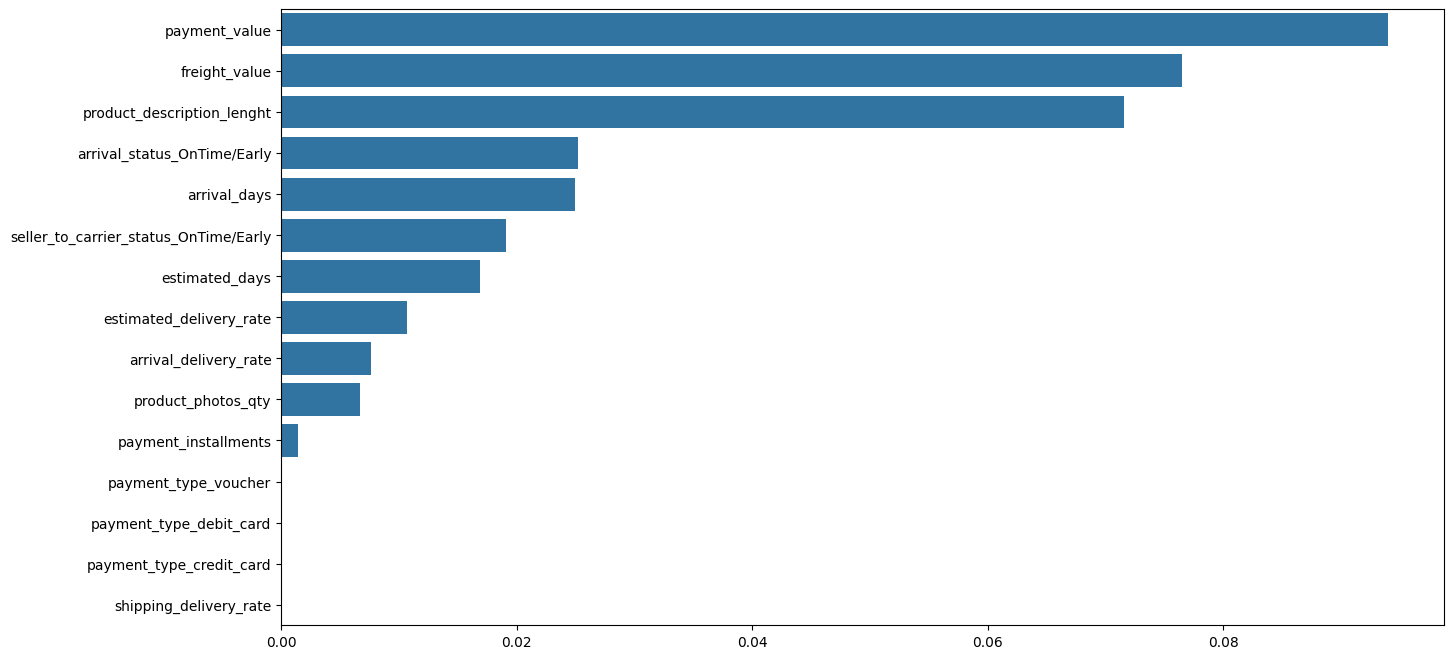

In [41]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

#### Select best 9 Features

In [42]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [43]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

### 5.4 Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [45]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

### 5.5 Handling Imbalance

##### Check imbalance percentage

In [46]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

review_score
Satisfied        68.26
Not Satisfied    31.74
Name: count, dtype: float64

##### Use SMOTE for handling imbalance

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 6.0 Modeling

### 6.1 Apply ML Models

### XGboost

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2905
           1       0.94      0.98      0.96      2905

    accuracy                           0.96      5810
   macro avg       0.96      0.96      0.96      5810
weighted avg       0.96      0.96      0.96      5810

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.66      0.57      0.61       338
           1       0.81      0.86      0.84       726

    accuracy                           0.77      1064
   macro avg       0.74      0.72      0.73      1064
weighted avg       0.76      0.77      0.77      1064



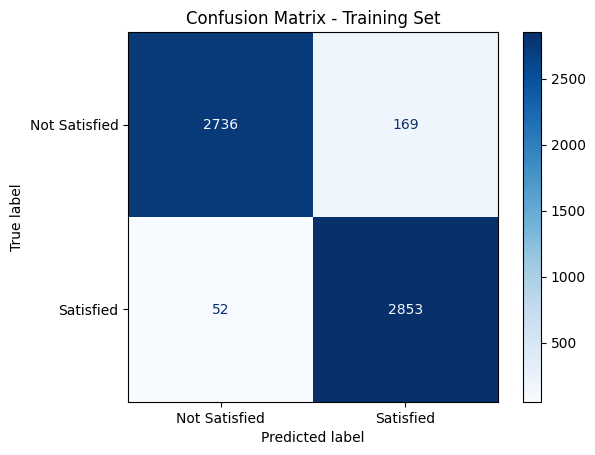

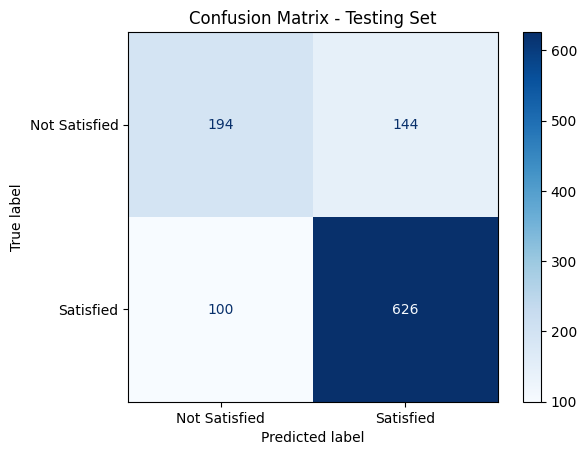

In [48]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Encode the target labels
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.transform(y_test)  # Use transform to avoid fitting again on y_test

# Train the XGBoost classifier
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train_xg, xg.predict(x_train_resampled))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=le.classes_)
disp_train.plot(cmap='Blues')  # Use a colormap for better visualization
plt.title('Confusion Matrix - Training Set')
plt.show()

# Confusion Matrix for Testing Set
cm_test = confusion_matrix(y_test_xg, xg.predict(x_test_scaled))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=le.classes_)
disp_test.plot(cmap='Blues')  # Use a colormap for better visualization
plt.title('Confusion Matrix - Testing Set')
plt.show()


### 6.2 Hyperparameter Tuning

#### XGboost

In [49]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
    #'learning_rate': [0.1, 0.2],
    #'max_depth': [5, 7, 8],
    #'n_estimators': [100, 200] 
    #}
#grid_search = GridSearchCV(xg, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
#grid_search.fit(x_train_resampled, y_train_xg)

In [50]:
final_xg_model = XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200)
final_xg_model.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))

Evaluation on Training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      2905

    accuracy                           1.00      5810
   macro avg       1.00      1.00      1.00      5810
weighted avg       1.00      1.00      1.00      5810

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.70      0.59      0.64       338
           1       0.82      0.88      0.85       726

    accuracy                           0.79      1064
   macro avg       0.76      0.74      0.74      1064
weighted avg       0.78      0.79      0.78      1064



#### Select XGboost for pipeline as it provides highest performance on testing

# 7.0 Pipeline

In [51]:
df_pipeline = df.copy()
df_pipeline.head()

,review_score,freight_value,product_description_lenght,product_photos_qty,payment_type,payment_installments,payment_value,estimated_days,arrival_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,Not Satisfied,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
1,Not Satisfied,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,Not Satisfied,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,Not Satisfied,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
4,Not Satisfied,44.89,1290.0,1.0,boleto,1.0,1024.4,40,23,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast


#### Encoding Review score to 0 and 1

In [52]:
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

### Split Input Features and Targe Variable

In [53]:
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

### Split into Train & Test

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

### Prepare Numerical Features

In [55]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dtype='object')

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')), 
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

### Prepare Categorical Features

In [57]:
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [58]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [59]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='median')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dty...
                                ('Cat Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoding',
                                                  OneHotEncoder(drop='first')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object'))])

In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()), 
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [61]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [62]:
import joblib
joblib.dump(final_pipeline, 'Brazilian_Ecommerce_Classification.bkl')

['Brazilian_Ecommerce_Classification.bkl']

# 8.0 NLP For Customer Satisfaction

In [63]:
# Menentukan kolom yang ingin diambil
columns_to_display = [
    "review_id",
    "order_id",
    "review_score",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp"
]

# Menampilkan 5 baris pertama dari kolom yang dipilih
reviews_df = dfasli[columns_to_display]
print(reviews_df.head())


                          review_id                          order_id  \
0  48c5faf6c6d2ee4bd94aa925ebec2a2f  588319a0ed0db7baaa43a314a333434c   
1  32a666daa0e56604ae2e14207ba43f9e  d53f2f6c0bd9152936601ea9590e1840   
2  1bfe557107e1cb4879ba69f47a6dd600  b8fa6b76d00678e1781c0ff1ed4b55dd   
3  655f88b2a68349ed34fe4b53b4a19334  748cd327f8dd41d29e7f94c334beb869   
4  da6f8802a32ff86ff99bd29f287b1cab  e956922814f88f0d713f466cf03dace0   

   review_score review_comment_title  \
0           5.0                  NaN   
1           5.0                  NaN   
2           5.0                  NaN   
3           5.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-02-20 00:00:00   
1                                                NaN  2017-05-25 00:00:00   
2  Muito bom o produto, chegou dentro do prazo de...  2017-07-12 00:00:00   
3           

In [64]:
# Remove 'review_comment_title' because of high missing values perentage and remove other features for unneccessity
reviews_df = reviews_df[['review_comment_message', 'review_score']]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_comment_message  23180 non-null  object 
 1   review_score            54530 non-null  float64
dtypes: float64(1), object(1)
memory usage: 859.5+ KB


In [65]:
# Drop missing values
reviews_df.dropna(inplace= True)

# Rename columns for ease
reviews_df.rename(columns = {'review_comment_message' : 'comment', 'review_score' : 'score'}, inplace= True)

# Reset index
reviews_df.reset_index(inplace= True, drop= True)

In [66]:
# Encode scores to be Satisfied or Not Satisfied
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

reviews_df['score'] = reviews_df['score'].map(encoded_class)

#### Text Cleaning & Processing

In [67]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import ssl
import nltk
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
stemmer = PorterStemmer()
corpus = []

for i in range(reviews_df.shape[0]):
    # Remove any special characters or number
    comment = re.sub('[^a-zA-Z]', ' ', reviews_df.comment[i])
    # Lower text
    comment = comment.lower()
    # Remove any spaces before or after text
    comment = comment.strip()
    # Split text for stemming
    comment = comment.split()
    # Stemming words in Portugues
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    # Merge stemmed words to be sentences
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['bom produto chegou dentro prazo entrega bem embalado mesma caract stica relatada descri p gina produto',
 'comprei doi produto s chegou at present momento',
 'comprei doi produto s chegou at present momento',
 'r pido entrega bem ant prazo',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei doi fone ouvido s recebi ainda funcionar estarei devolvendo pr xima segunda feira',
 'comprei doi fone ouvido s recebi ainda funcionar estarei devolvendo pr xima segunda feira',
 'voltarei comprar vendedor produto perfeito chegou ant prazo grata',
 '',
 'pensei entregu ant prazo nenhuma coisa nenhuma outra',
 'bom',
 'comprei chegar casa n correio problema parceiro baratheon avalia ruim porqu parceiro baratheon n est cumprindo entrega pr

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TFIDF Vectorizer to convert text into numbers
tf = TfidfVectorizer()
df_new = tf.fit_transform(corpus).toarray()

In [69]:
df_new = pd.DataFrame(df_new, columns= tf.get_feature_names_out())
df_new

,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaguardando,aancheira,ab,abaixar,abaixo,abajour,abajur,...,zelador,zelo,zenfon,zerar,zero,ziper,zo,zoom,zufer,zumax
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split into Input Features & Target Variable

In [70]:
X = df_new
y = reviews_df['score']

#### Split data into Train & Test

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.90      0.87      0.88      7242
    Satisfied       0.92      0.94      0.93     11302

     accuracy                           0.91     18544
    macro avg       0.91      0.90      0.90     18544
 weighted avg       0.91      0.91      0.91     18544

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.87      0.86      0.86      1811
    Satisfied       0.91      0.91      0.91      2825

     accuracy                           0.89      4636
    macro avg       0.89      0.89      0.89      4636
 weighted avg       0.89      0.89      0.89      4636



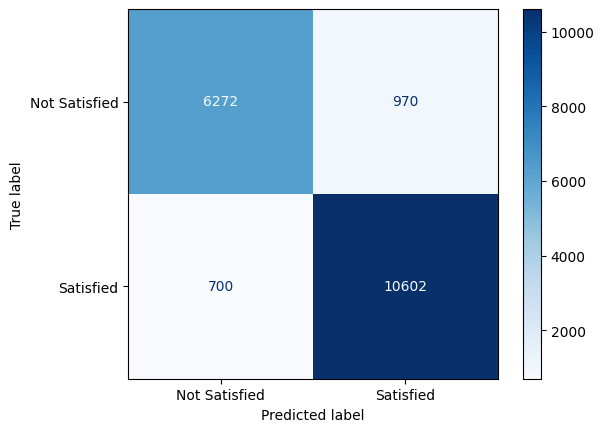

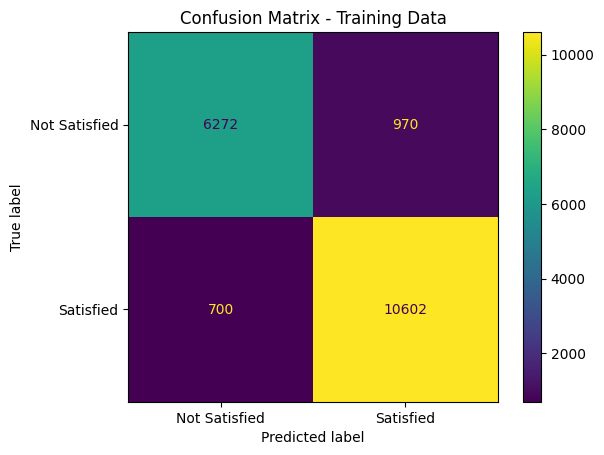

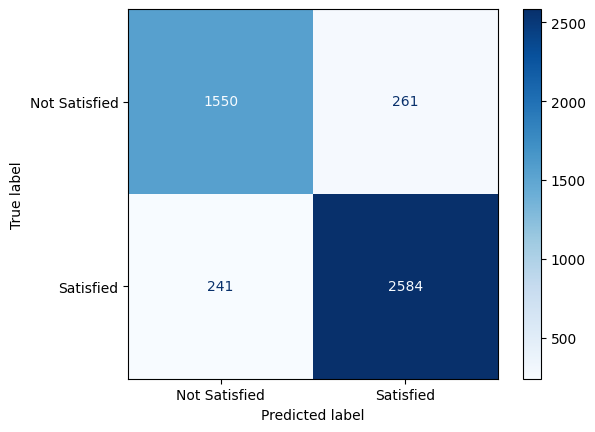

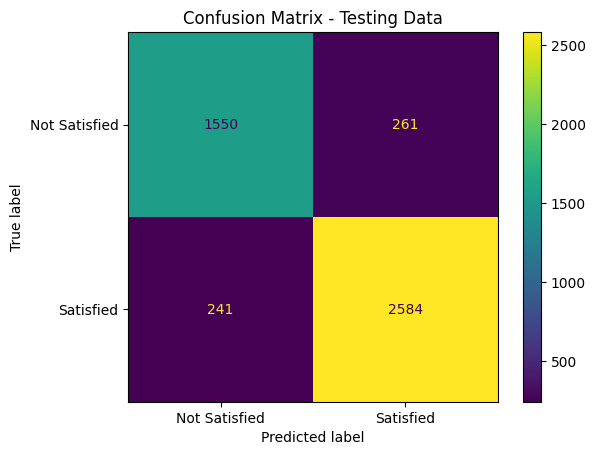

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

# Evaluasi Training dan Testing
print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

# Confusion Matrix untuk Training Data
disp_train = ConfusionMatrixDisplay.from_estimator(nb, x_train, y_train, cmap='Blues')
disp_train.plot()
plt.title("Confusion Matrix - Training Data")
plt.show()

# Confusion Matrix untuk Testing Data
disp_test = ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test, cmap='Blues')
disp_test.plot()
plt.title("Confusion Matrix - Testing Data")
plt.show()


##### Now we have a reliable model with better results for classifying customers based on reviews, Next we should investigate further reasons for non-satisfaction.

#### Check Reasons for Non-Satisfaction

In [73]:
# Create a separate DataFrame to check reasons of non satisfaction 
non_satisfied = reviews_df[reviews_df.score == 'Not Satisfied']

# Reset index
non_satisfied.reset_index(inplace= True, drop= True)

#### Text Cleaning & Processing

In [74]:
stemmer = PorterStemmer()
corpus = []

for i in range(non_satisfied.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', non_satisfied.comment[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['comprei doi produto s chegou at present momento',
 'comprei doi produto s chegou at present momento',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei cadeira recebi aguardando cadeira restant pedido',
 'comprei doi fone ouvido s recebi ainda funcionar estarei devolvendo pr xima segunda feira',
 'comprei doi fone ouvido s recebi ainda funcionar estarei devolvendo pr xima segunda feira',
 'pensei entregu ant prazo nenhuma coisa nenhuma outra',
 'bom',
 'comprei chegar casa n correio problema parceiro baratheon avalia ruim porqu parceiro baratheon n est cumprindo entrega prazo',
 'ficha t cnica poderia est escrito var viria part comprei esperando receb var inteiro',
 'n recomendar loja poi ainda n recebi produto',
 'at present momento n recebi produto',
 'nao recebi produto',
 'ap s s

#### Translate sample of non-satisfied comments for comprehension

#### From the study of non-satisfied customers reviews, we can see that majority of words mentioned are related to shipping issues.

# 9.0 Customer Segmentation

### 9.1 Customer Segmentation by RFM Analysis

In [75]:
df_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,6c0a32063bce9f24338b38d689988b98,1c6c028831cfe21ab6c55c8f455ab2cd,21030,rio de janeiro,RJ,4dac5a355ca2b9da23d60ed243be5673,2018-04-14 16:11:37,2018-04-17 06:11:36,2018-04-30 13:44:00,2018-05-07 20:49:01,...,Furniture,68970.0,40,23,7,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
1,6c0a32063bce9f24338b38d689988b98,1c6c028831cfe21ab6c55c8f455ab2cd,21030,rio de janeiro,RJ,4dac5a355ca2b9da23d60ed243be5673,2018-04-14 16:11:37,2018-04-17 06:11:36,2018-04-30 13:44:00,2018-05-07 20:49:01,...,Furniture,68970.0,40,23,7,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
2,6c0a32063bce9f24338b38d689988b98,1c6c028831cfe21ab6c55c8f455ab2cd,21030,rio de janeiro,RJ,4dac5a355ca2b9da23d60ed243be5673,2018-04-14 16:11:37,2018-04-17 06:11:36,2018-04-30 13:44:00,2018-05-07 20:49:01,...,Furniture,68970.0,40,23,7,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
3,6c0a32063bce9f24338b38d689988b98,1c6c028831cfe21ab6c55c8f455ab2cd,21030,rio de janeiro,RJ,4dac5a355ca2b9da23d60ed243be5673,2018-04-14 16:11:37,2018-04-17 06:11:36,2018-04-30 13:44:00,2018-05-07 20:49:01,...,Furniture,68970.0,40,23,7,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast
4,6c0a32063bce9f24338b38d689988b98,1c6c028831cfe21ab6c55c8f455ab2cd,21030,rio de janeiro,RJ,4dac5a355ca2b9da23d60ed243be5673,2018-04-14 16:11:37,2018-04-17 06:11:36,2018-04-30 13:44:00,2018-05-07 20:49:01,...,Furniture,68970.0,40,23,7,OnTime/Early,OnTime/Early,Very Slow,Neutral,Very Fast


In [76]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_2.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

#### Create Recency, Frequancy and Monetary Features

In [77]:
from datetime import datetime

rfm_table = df_2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

,order_purchase_timestamp,product_id,payment_value
customer_unique_id,,,
000ec5bff359e1c0ad76a81a45cb598f,7,1,27.75
00172711b30d52eea8b313a7f2cced02,31,1,122.07
0019e8c501c85848ac0966d45226fa1d,119,1,197.27
002311514717ca8b65b09a26cdf7b91a,62,1,124.32
0025795df7a7d077c4c90162fa820085,35,2,428.16
...,...,...,...
ffd2aa973e106c7d7218a960320420bd,96,1,39.34
ffe204b1bb8026741b839085b2fd10f2,19,1,156.70
ffeb904468642a1ce663a322629801cb,62,1,93.11


In [78]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequancy','payment_value':'Monetary'}, inplace=True)
rfm_table

,Recency,Frequancy,Monetary
customer_unique_id,,,
000ec5bff359e1c0ad76a81a45cb598f,7,1,27.75
00172711b30d52eea8b313a7f2cced02,31,1,122.07
0019e8c501c85848ac0966d45226fa1d,119,1,197.27
002311514717ca8b65b09a26cdf7b91a,62,1,124.32
0025795df7a7d077c4c90162fa820085,35,2,428.16
...,...,...,...
ffd2aa973e106c7d7218a960320420bd,96,1,39.34
ffe204b1bb8026741b839085b2fd10f2,19,1,156.70
ffeb904468642a1ce663a322629801cb,62,1,93.11


#### Create Recency, Frequancy and Monetary scores

In [79]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score
customer_unique_id,,,,,,
000ec5bff359e1c0ad76a81a45cb598f,7,1,27.75,4,1,1
00172711b30d52eea8b313a7f2cced02,31,1,122.07,4,1,2
0019e8c501c85848ac0966d45226fa1d,119,1,197.27,1,1,3
002311514717ca8b65b09a26cdf7b91a,62,1,124.32,3,1,3
0025795df7a7d077c4c90162fa820085,35,2,428.16,3,4,4
...,...,...,...,...,...,...
ffd2aa973e106c7d7218a960320420bd,96,1,39.34,2,4,1
ffe204b1bb8026741b839085b2fd10f2,19,1,156.70,4,4,3
ffeb904468642a1ce663a322629801cb,62,1,93.11,3,4,2


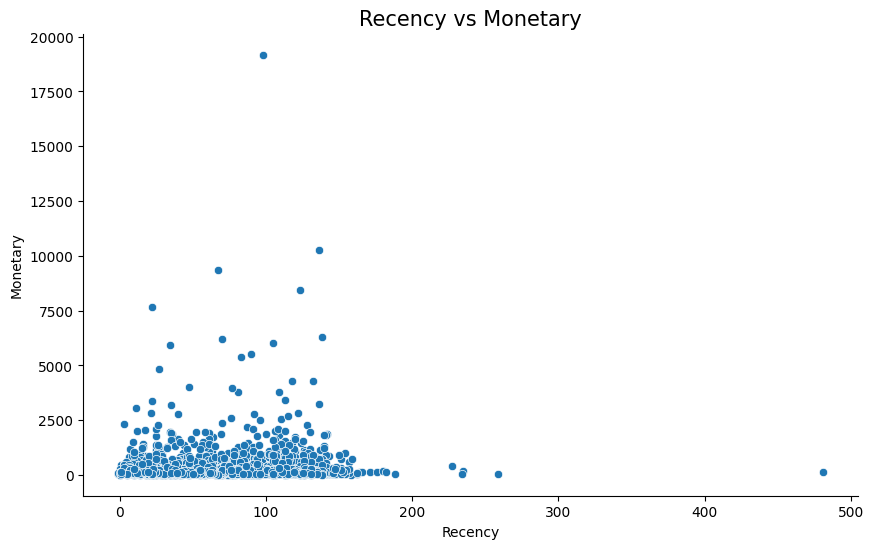

In [80]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

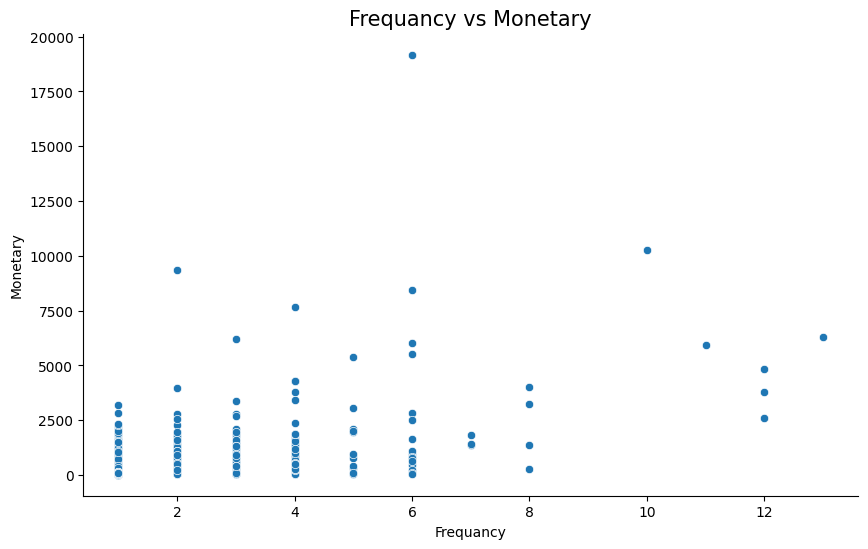

In [81]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequancy', y='Monetary', data=rfm_table)
plt.title('Frequancy vs Monetary', fontsize= 15)
sns.despine()

#### Calculate RFM Score

In [82]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score
customer_unique_id,,,,,,,
000ec5bff359e1c0ad76a81a45cb598f,7,1,27.75,4,1,1,411
00172711b30d52eea8b313a7f2cced02,31,1,122.07,4,1,2,412
0019e8c501c85848ac0966d45226fa1d,119,1,197.27,1,1,3,113
002311514717ca8b65b09a26cdf7b91a,62,1,124.32,3,1,3,313
0025795df7a7d077c4c90162fa820085,35,2,428.16,3,4,4,344
...,...,...,...,...,...,...,...
ffd2aa973e106c7d7218a960320420bd,96,1,39.34,2,4,1,241
ffe204b1bb8026741b839085b2fd10f2,19,1,156.70,4,4,3,443
ffeb904468642a1ce663a322629801cb,62,1,93.11,3,4,2,342


#### Cluster customers based on RFM Score

In [83]:
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New customers'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'High risk to churn' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

,Recency,Frequancy,Monetary,r_score,f_score,m_score,rfm_score,customer_segmentation
customer_unique_id,,,,,,,,
000ec5bff359e1c0ad76a81a45cb598f,7,1,27.75,4,1,1,411,New customers
00172711b30d52eea8b313a7f2cced02,31,1,122.07,4,1,2,412,New customers
0019e8c501c85848ac0966d45226fa1d,119,1,197.27,1,1,3,113,Lost customers
002311514717ca8b65b09a26cdf7b91a,62,1,124.32,3,1,3,313,Lost customers
0025795df7a7d077c4c90162fa820085,35,2,428.16,3,4,4,344,New customers
...,...,...,...,...,...,...,...,...
ffd2aa973e106c7d7218a960320420bd,96,1,39.34,2,4,1,241,High risk to churn
ffe204b1bb8026741b839085b2fd10f2,19,1,156.70,4,4,3,443,Very Loyal
ffeb904468642a1ce663a322629801cb,62,1,93.11,3,4,2,342,Potential customer


/tmp/ipykernel_770/3470747892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')


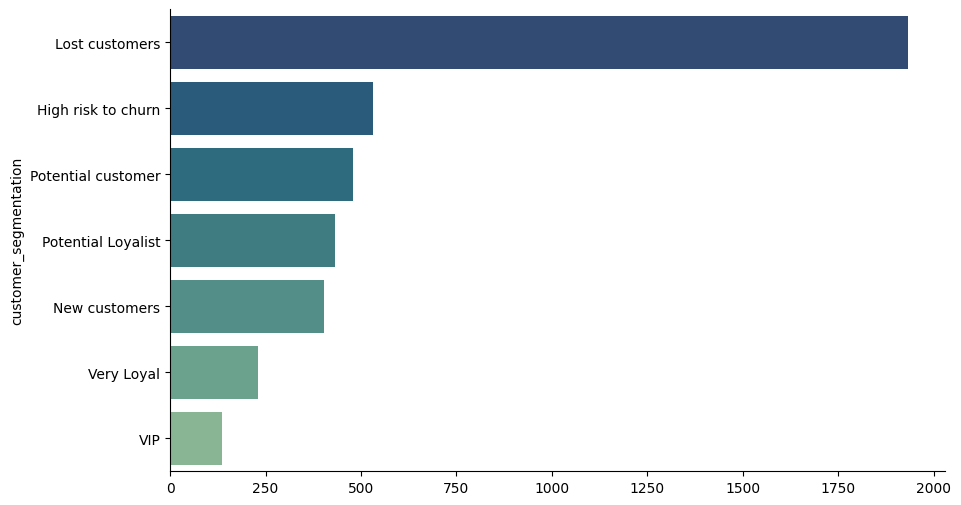

In [84]:
# Plot frquency of each segment
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')
sns.despine()

### Check Outliers

In [85]:
rfm_table.describe()

,Recency,Frequancy,Monetary,rfm_score
count,4144.000000,4144.000000,4144.000000,4144.000000
mean,71.376689,1.283784,243.876120,279.092423
std,41.875939,0.808217,573.088284,112.049287
min,-1.000000,1.000000,14.380000,111.000000
25%,34.000000,1.000000,68.342500,211.000000
50%,70.000000,1.000000,123.180000,311.000000
75%,109.000000,1.000000,223.612500,411.000000
max,481.000000,13.000000,19174.380000,444.000000


#### Recency

<AxesSubplot: xlabel='Recency'>

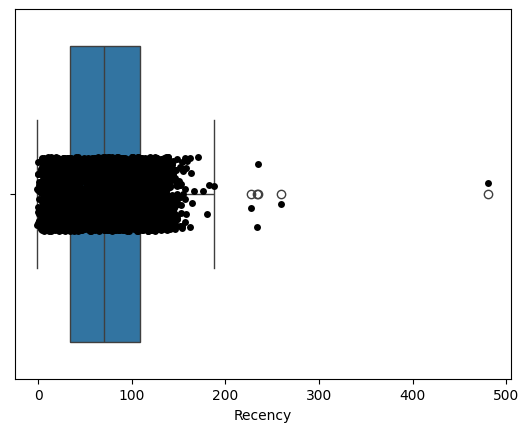

In [86]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'black')

#### Frequancy

<AxesSubplot: xlabel='Frequancy'>

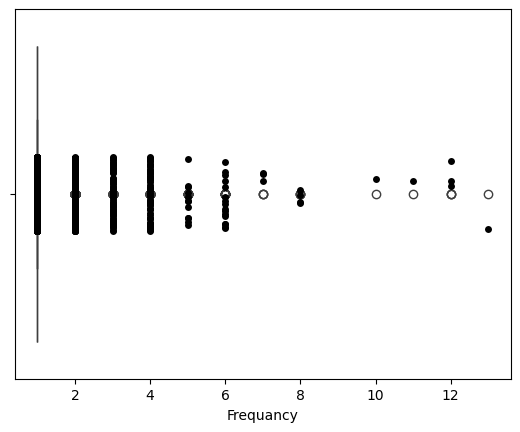

In [87]:
sns.boxplot(x= rfm_table.Frequancy)
sns.stripplot(x = rfm_table.Frequancy, color= 'black')

#### Monetary

<AxesSubplot: xlabel='Monetary'>

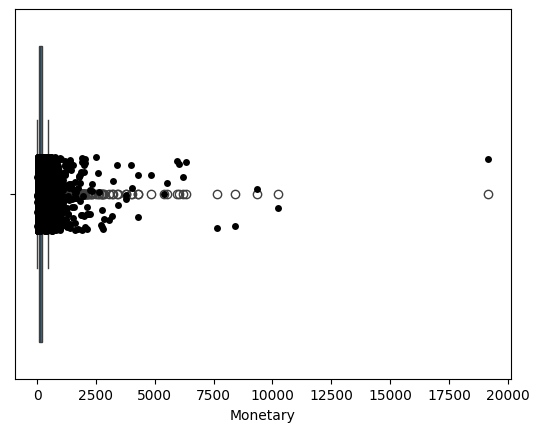

In [88]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'black')

#### Remove Extreme 5% of Outliers

In [89]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequancy, 5), np.percentile(rfm_table.Frequancy, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 10.0 133.0
Frequancy 5% Outliers Limits: 1.0 2.0
Monetary 5% Outliers Limits: 34.3375 762.4709999999995


#### Remove Outliers for Recency & Monetary (Extreme 5%)

In [90]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

In [91]:
! pip3 install squarify


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


#### Customer Segmentation Grid

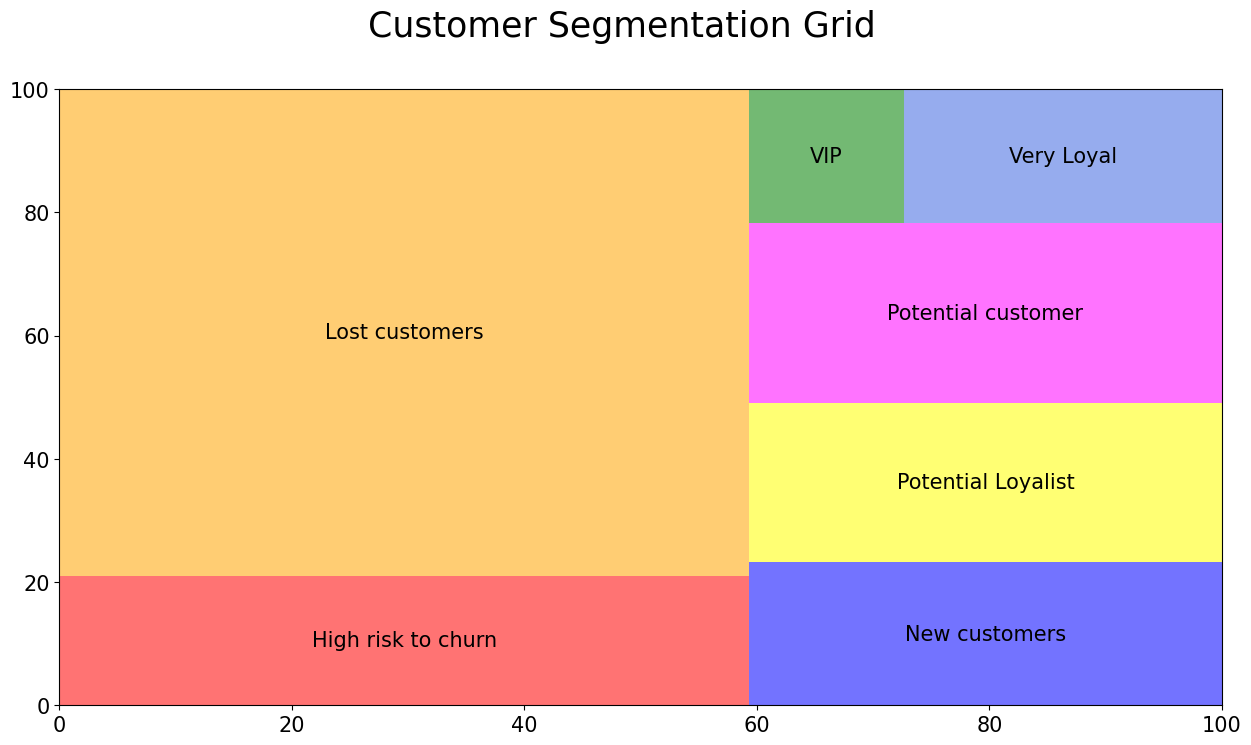

In [92]:
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=15)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["red", "orange", "blue", "yellow", "fuchsia", "green", "royalblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

#### Recency & Monetary Plot

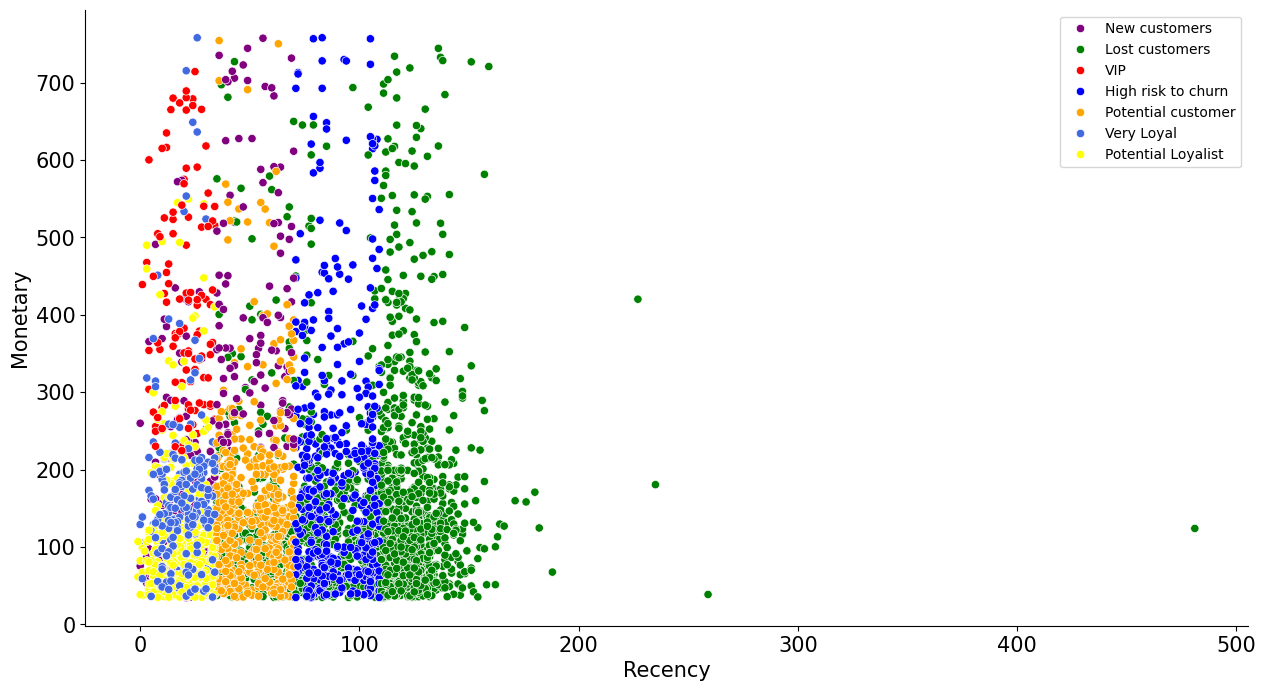

In [93]:
plt.figure(figsize= [15, 8])
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

### Check Skeweness

/tmp/ipykernel_770/3613615011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm_table.Recency)


<AxesSubplot: ylabel='Density'>

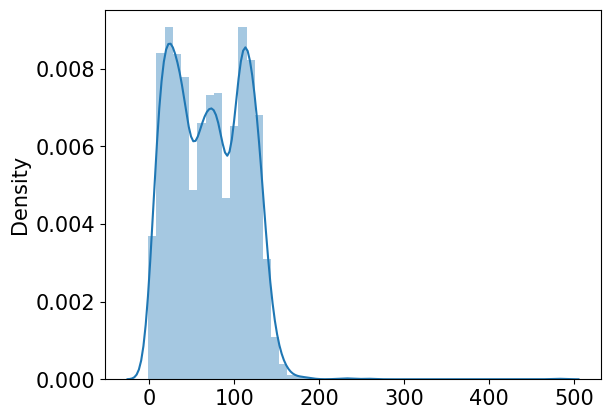

In [94]:
# Recency
sns.distplot(x= rfm_table.Recency)

/tmp/ipykernel_770/3761939287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm_table.Frequancy)


<AxesSubplot: ylabel='Density'>

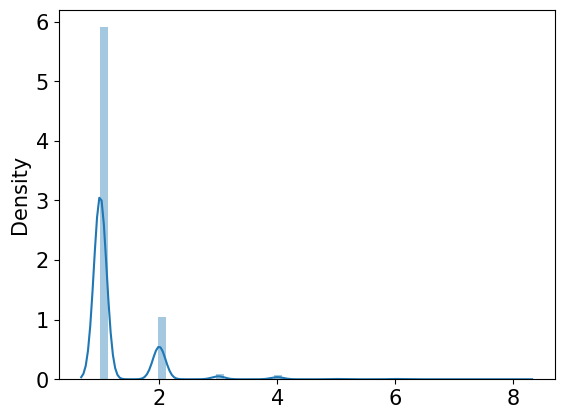

In [95]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

/tmp/ipykernel_770/938277264.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm_table.Monetary)


<AxesSubplot: ylabel='Density'>

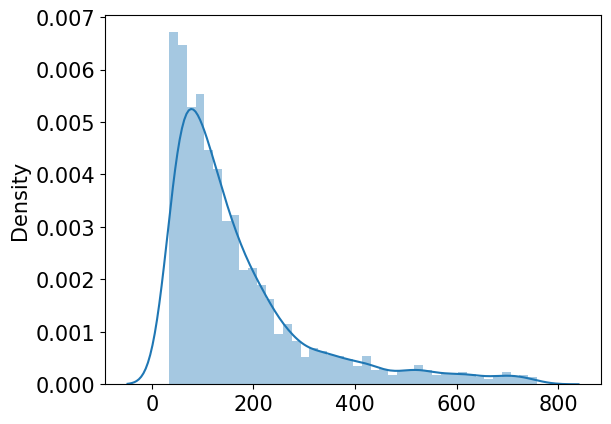

In [96]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

#### Apply Log function to handle skeweness for Frequancy & Monetary

In [97]:
for i in ['Frequancy', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

/tmp/ipykernel_770/3761939287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm_table.Frequancy)


<AxesSubplot: ylabel='Density'>

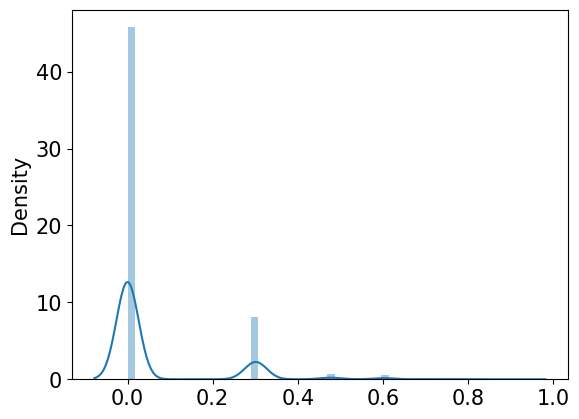

In [98]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

/tmp/ipykernel_770/938277264.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= rfm_table.Monetary)


<AxesSubplot: ylabel='Density'>

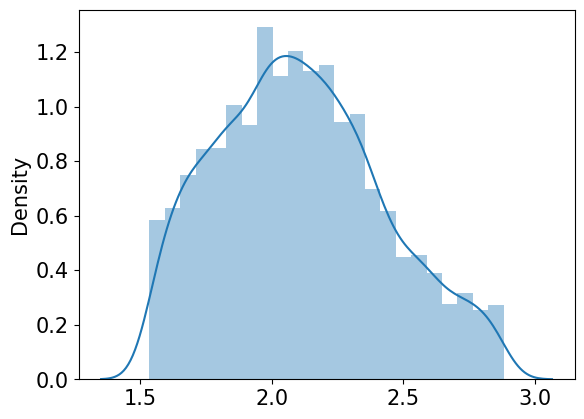

In [99]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

### 9.2 Clustering with K-means

In [100]:
df_cluster = df_2[['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']]
df_cluster

,freight_value,price,payment_value,payment_installments,payment_sequential
0,44.89,159.99,1024.40,1.0,1.0
1,44.89,159.99,1024.40,1.0,1.0
2,44.89,159.99,1024.40,1.0,1.0
3,44.89,159.99,1024.40,1.0,1.0
4,44.89,159.99,1024.40,1.0,1.0
...,...,...,...,...,...
5315,18.82,134.90,153.72,1.0,1.0
5316,9.31,79.90,89.21,2.0,1.0
5317,7.75,24.90,32.65,1.0,1.0
5318,7.39,14.40,21.79,1.0,1.0


### Take sample from data (10k)

In [101]:
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

#### Save sample as CSV for deployment

In [102]:
df_sample.to_csv('Clustering Sample.csv')

In [103]:
df_sample.describe()

,freight_value,price,payment_value,payment_installments,payment_sequential
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,22.144752,126.930964,189.966662,2.961466,1.051880
std,18.921215,208.078559,265.932945,2.762828,0.322054
min,0.000000,0.850000,0.050000,1.000000,1.000000
25%,12.867500,39.965000,66.365000,1.000000,1.000000
50%,18.230000,78.000000,121.915000,2.000000,1.000000
75%,23.380000,139.900000,208.320000,4.000000,1.000000
max,294.760000,4590.000000,4681.780000,20.000000,7.000000


#### Drop freight values with zeros

In [104]:
df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

#### Take copy for Pipeline

In [105]:
cluster_pipeline = df_sample.copy()

In [106]:
for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
    df_sample[i] = np.log10(df_sample[i])

### Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
data_scaled = sc.fit_transform(df_sample)

#### Detecting number of clusters uning Elbow Method

Text(0, 0.5, 'WCSS')

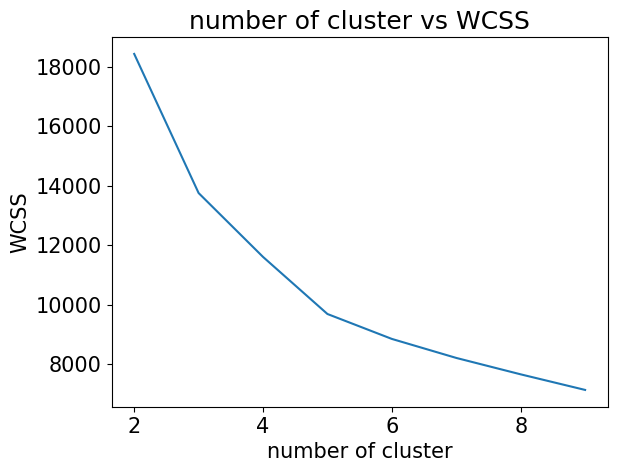

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred_kmean = kmean.fit_predict(data_scaled)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(data_scaled,y_pred_kmean))

plt.plot(range(2,10),wcss)
plt.title('number of cluster vs WCSS')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

#### Detecting number of clusters using Silhouete Score

Text(0, 0.5, 'silhouette_score')

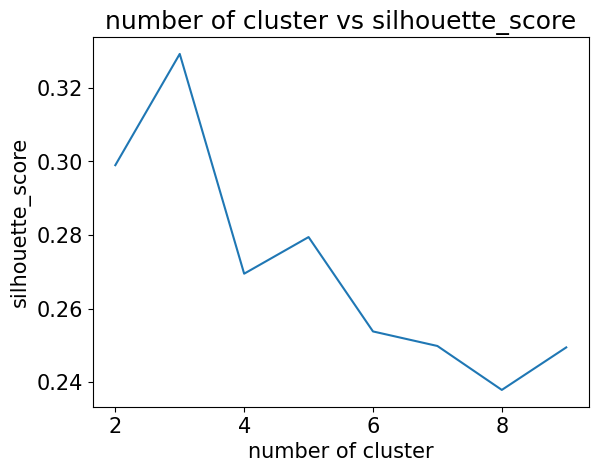

In [109]:
plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

#### Select number of clusters k= 3

In [110]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)

In [111]:
# Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(2838, 188, 2229)

In [112]:
# Ambil sampel acak dari df_cluster sebanyak 9966 baris
original_cluster_sample = df_cluster.sample(frac= 1, random_state= 42)[:5255]

# Pastikan panjang y_pred_kmean sama dengan panjang original_cluster_sample
if len(y_pred_kmean) == len(original_cluster_sample):
    # Menambahkan cluster label ke dalam sampel
    original_cluster_sample['cluster_label'] = y_pred_kmean
    print(original_cluster_sample.head())
else:
    print(f"Panjang y_pred_kmean: {len(y_pred_kmean)} tidak cocok dengan panjang original_cluster_sample: {len(original_cluster_sample)}")


      freight_value    price  payment_value  payment_installments  \
1878          22.34  1999.99        2022.33                  20.0   
5034           9.07   160.00          69.07                   6.0   
3752           8.41    35.90          44.31                   1.0   
4184          16.61    59.90          76.51                   2.0   
555           19.81    89.00         108.81                   1.0   

      payment_sequential  cluster_label  
1878                 1.0              2  
5034                 1.0              2  
3752                 1.0              0  
4184                 1.0              0  
555                  1.0              0  


In [113]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0            1            2
freight_value        count  2838.000000   188.000000  2229.000000
                     mean     21.988978    20.635426    22.383899
                     std      18.240816    16.588834    19.698825
                     min       0.000000     0.000000     0.000000
                     25%      12.860000    13.027500    12.870000
                     50%      18.240000    17.970000    18.230000
                     75%      23.360000    22.375000    23.430000
                     max     206.500000   133.870000   294.760000
price                count  2838.000000   188.000000  2229.000000
                     mean    126.183978   123.667340   127.469646
                     std     197.131644   154.090675   220.143746
                     min       4.900000     7.990000     0.850000
                     25%      39.960000    45.727500    39.800000
                     50%      78.000000    79.900000    75.000000
                     75%     139.990000   135.000000   139.000000
                     max    4590.000000  1106.990000  4590.000000
payment_value        count  2838.000000   188.000000  2229.000000
                     mean    188.978520   185.827872   191.073508
                     std     257.291686   197.703260   278.500588
                     min       0.050000     1.180000     0.670000
                     25%      67.137500    75.882500    65.440000
                     50%     122.395000   123.525000   120.800000
                     75%     212.695000   218.032500   201.090000
                     max    4681.780000  1127.290000  4681.780000
payment_installments count  2838.000000   188.000000  2229.000000
                     mean      3.024665     2.750000     2.891880
                     std       2.806927     2.639934     2.709527
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       2.000000     1.000000     1.000000
                     75%       4.000000     4.000000     4.000000
                     max      20.000000    16.000000    20.000000
payment_sequential   count  2838.000000   188.000000  2229.000000
                     mean      1.050388     1.021277     1.056528
                     std       0.327235     0.144690     0.327439
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       1.000000     1.000000     1.000000
                     75%       1.000000     1.000000     1.000000
                     max       6.000000     2.000000     7.000000

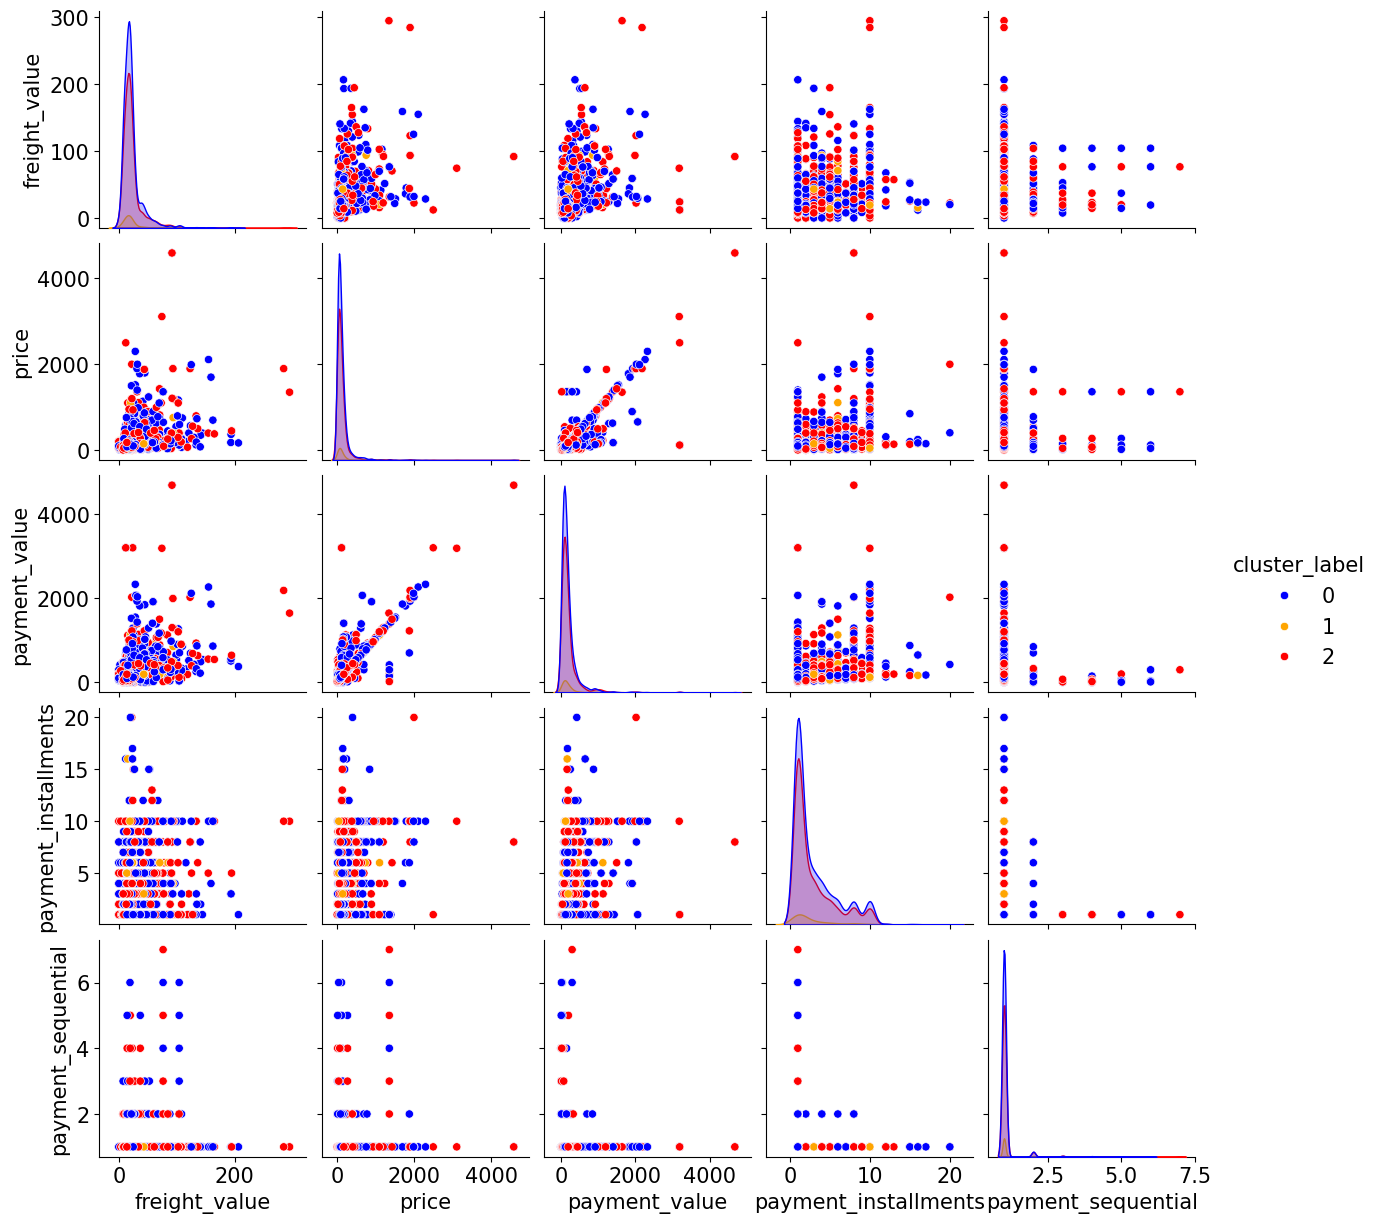

In [114]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'orange', 'red'])

#### As we can see from statistics table and pairplot that clusters have high percentage of overlaping, sow RFM would be better in this case to cluster customers.

#### Show Kmeans Clusters

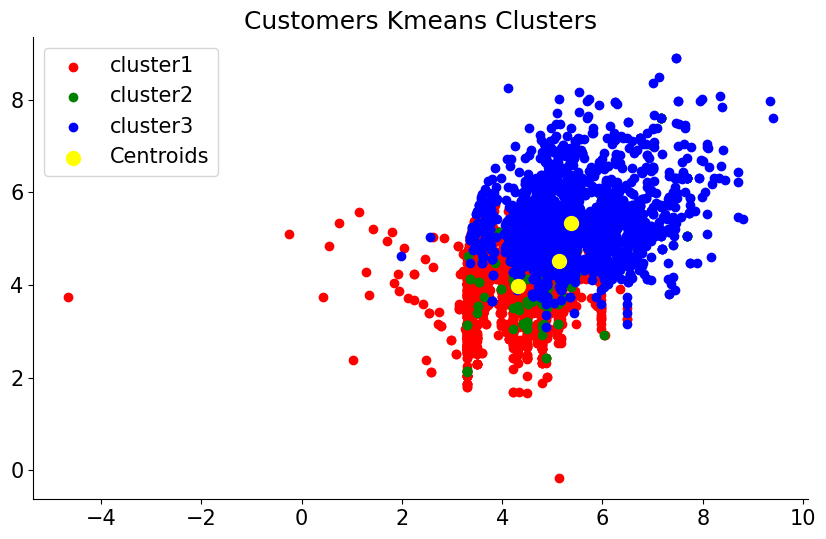

In [115]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 100,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

#### Show Clusters using PCA

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

array([0.47502084, 0.22083967])

Text(0, 0.5, 'WCSS')

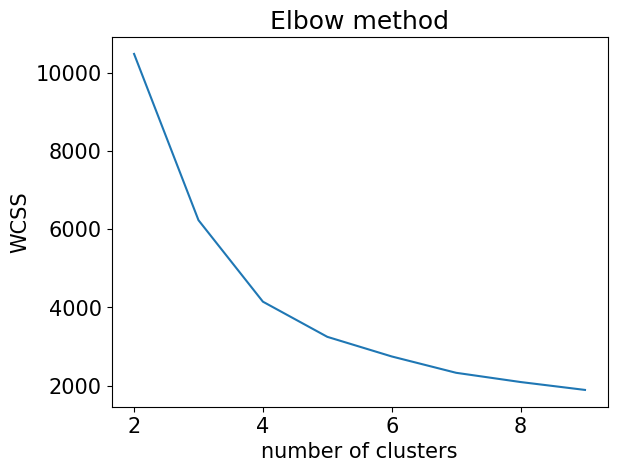

In [117]:
wcss = []
scores = []
for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred = kmean.fit_predict(x_pca)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(x_pca,y_pred))
plt.plot(range(2,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')  

Text(0, 0.5, 'silhouette_score')

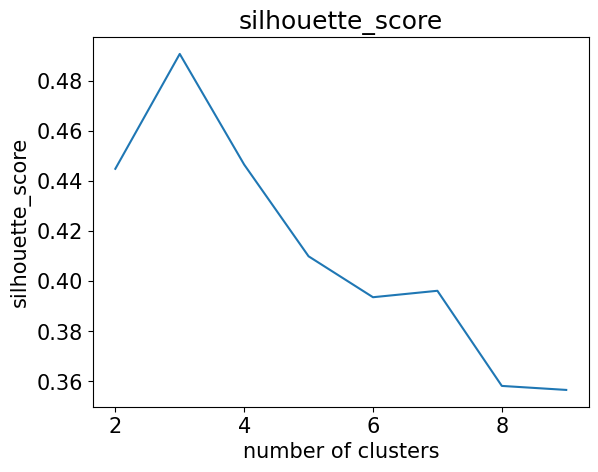

In [118]:
plt.plot(range(2,10),scores)
plt.title('silhouette_score')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')

In [119]:
kmean = KMeans(n_clusters=3)
y_pred_pca = kmean.fit_predict(x_pca)

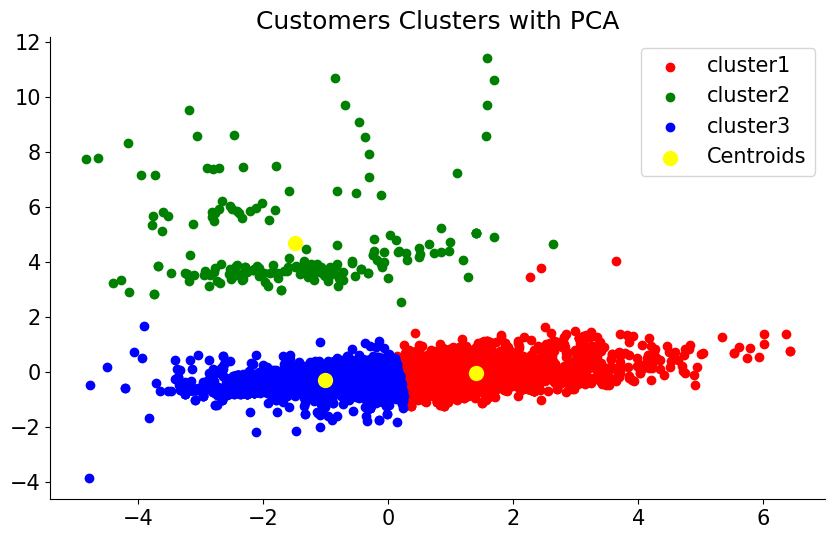

In [120]:
plt.figure(figsize=[10, 6])
plt.scatter(x_pca[y_pred_pca==0,0],x_pca[y_pred_pca==0,1],c = 'red',label = 'cluster1')
plt.scatter(x_pca[y_pred_pca==1,0],x_pca[y_pred_pca==1,1],c = 'green',label = 'cluster2')
plt.scatter(x_pca[y_pred_pca==2,0],x_pca[y_pred_pca==2,1],c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='yellow',s=100,label='Centroids')
plt.title('Customers Clusters with PCA')
plt.legend()
sns.despine()

## 9.3 Pipeline

#### Prepare Features

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

numerical_pipeline_cluster = Pipeline(steps=[('Feature Scaling', StandardScaler(with_mean=False))])

In [122]:
from sklearn.compose import ColumnTransformer

preprocessing_cluster = ColumnTransformer(transformers= [('Numerical Columns', numerical_pipeline_cluster, cluster_pipeline.columns)], 
                                          remainder= 'passthrough')
preprocessing_cluster

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])

In [123]:
final_pipeline_cluster = Pipeline(steps=[('Preprocessing', preprocessing_cluster), ('Log Transformer', FunctionTransformer(np.log10)),
                                ('Model', KMeans(n_clusters= 3))])
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [124]:
# Fit pipeline to Dataframe
final_pipeline_cluster.fit(cluster_pipeline)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [125]:
# Save model as bkl file
import joblib
joblib.dump(final_pipeline_cluster, 'Brazilian_Ecommerce_Clustering.bkl')

['Brazilian_Ecommerce_Clustering.bkl']

In [126]:
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

# 10.0 Model Deployment

In [127]:
model_classification = joblib.load('Brazilian_Ecommerce_Classification.bkl')
model_clustering = joblib.load('Brazilian_Ecommerce_Clustering.bkl')

#### Test Classification Model

In [128]:
model_classification.predict(pd.DataFrame({'freight_value' :[30], 'product_description_lenght' :[1000], 'product_photos_qty' :[4], 'payment_type' :['credit_card'], 'payment_installments' :[6], 'payment_value' :[1000], 'estimated_days' :[7], 'arrival_days' :[6], 'arrival_status' :['OnTime/Early'], 'seller_to_carrier_status' :['OnTime/Early'], 'estimated_delivery_rate' :['Very Fast'], 'arrival_delivery_rate' :['Very Fast'], 'shipping_delivery_rate' :['Very Fast']}))

array([1])

#### Test Clustering Model

In [129]:
model_clustering.predict(pd.DataFrame({'freight_value' :[10], 'price' :[90], 'payment_value' :[100], 'payment_installments' :[10], 'payment_sequential' :[3]}))

array([2], dtype=int32)

In [130]:
# Install neccessary libraries for deployment

! pip3 install ydata_profiling
! pip3 install streamlit_pandas_profiling


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Deployment with Streamlit

In [6]:
%%writefile Brazilian_Ecommerce_Project.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from streamlit_pandas_profiling import st_profile_report

# Load models
try:
    model_classification = joblib.load('Brazilian_Ecommerce_Classification.bkl')
    model_clustering = joblib.load('Brazilian_Ecommerce_Clustering.bkl')
except Exception as e:
    st.error(f"Error loading models: {e}")

# Sidebar to navigate between EDA, Classification, and Clustering
sidebar = st.sidebar
mode = sidebar.radio('Mode', ['EDA', 'Classification', 'Clustering'])
st.markdown("<h1 style='text-align: center; color: #ff0000;'></h1>", unsafe_allow_html=True)

if mode == "EDA":
    def main():
        # Header of Customer Satisfaction Prediction
        html_temp = """<div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Prediksi Kepuasan Pelanggan </h1>
                    </div>"""
        
        # Sidebar to upload CSV files
        with st.sidebar.header('Unggah File CSV Anda'):
            uploaded_file = st.sidebar.file_uploader('Unggah file CSV input Anda')

        if uploaded_file is not None:
            # Read file and Put headers
            EDA_sample = pd.read_csv(uploaded_file, index_col=0)
            pr = ProfileReport(EDA_sample, explorative=True)
            st.header('*Input DataFrame*')
            st.write(EDA_sample)
            st.write('---')
            st.header('*Pandas Profiling Report*')
            st_profile_report(pr)
        
        else:
            st.info('Menunggu file CSV diunggah.')

    if __name__ == '__main__':
        main()

if mode == "Classification":

    # Define function to predict classification based on assigned features
    def predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
    estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate):

        prediction_classification = model_classification.predict(pd.DataFrame({'freight_value' :[freight_value], 'product_description_lenght' :[product_description_lenght], 'product_photos_qty' :[product_photos_qty], 'payment_type' :[payment_type], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'estimated_days' :[estimated_days], 'arrival_days' :[arrival_days], 'arrival_status' :[arrival_status], 'seller_to_carrier_status' :[seller_to_carrier_status], 'estimated_delivery_rate' :[estimated_delivery_rate], 'arrival_delivery_rate' :[arrival_delivery_rate], 'shipping_delivery_rate' :[shipping_delivery_rate]}))
        return prediction_classification

    def main():
        # Header of Customer Satisfaction Prediction
        html_temp = """<div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Prediksi Kepuasan Pelanggan </h1>
                    </div>"""
        st.markdown(html_temp,unsafe_allow_html=True)
        
        # Assign all features with desired data input method
        sidebar.title('Numerical Features')
        product_description_lenght = sidebar.slider('Panjang Deskripsi Produk (Panjang deskripsi produk dalam karakter. Deskripsi yang lebih detail dapat mempengaruhi kepuasan pelanggan.)', 4, 3990, 100)
        product_photos_qty = sidebar.slider('Jumlah Foto Produk (Jumlah foto yang tersedia untuk produk. Lebih banyak foto dapat meningkatkan kepercayaan pelanggan.)', 1, 20, 1)
        payment_installments = sidebar.slider('Jumlah Cicilan (Jumlah pembayaran cicilan yang dipilih pelanggan.)', 1, 24, 1)
        estimated_days = sidebar.slider('Perkiraan Hari Pengiriman (Jumlah hari yang diperkirakan untuk pengiriman produk.)', 3, 60, 1)
        arrival_days = sidebar.slider('Hari Aktual Kedatangan (Jumlah hari aktual yang dibutuhkan produk untuk sampai.)', 0, 60, 1)
        payment_type = st.selectbox('Jenis Pembayaran', ['credit_card', 'boleto', 'voucher', 'debit_card']) 
        st.caption('Metode pembayaran yang dipilih pelanggan.')
        arrival_status = st.selectbox('Status Kedatangan', ['OnTime/Early', 'Late'])
        st.caption('Apakah produk tiba tepat waktu atau terlambat.')
        seller_to_carrier_status = st.selectbox('Status Pengiriman Pnejual', ['OnTime/Early', 'Late'])
        st.caption('Apakah penjual mengirim produk tepat waktu.')
        estimated_delivery_rate = st.selectbox('Tingkat Perkiraan Pengiriman', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        st.caption('Kecepatan pengiriman dibandingkan dengan perkiraan awal.')
        arrival_delivery_rate = st.selectbox('Tingkat Kedatangan Barang', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        st.caption('Kecepatan aktual pengiriman produk.')
        shipping_delivery_rate = st.selectbox('Tingkat Pengiriman', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        st.caption('Kualitas keseluruhan proses pengiriman.')
        payment_value = st.text_input('Nilai Pembayaran', '')
        st.caption('Total nilai pembayaran yang dilakukan pelanggan.')
        freight_value = st.text_input('Biaya Pengiriman', '')
        st.caption('Biaya pengiriman untuk pesanan.')
        result = ''

        # Predict Customer Satisfaction
        if st.button('Predict_Satisfaction'):
            result = predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
                                        estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate)
                                      

            if result == 0:
                result = 'Tidak Puas'
                st.success(f'Pelanggan {result}')
            else:
                result = 'Puas'
                st.success(f'Pelanggan {result}')

    if __name__ == '__main__':
        main()

if mode == "Clustering":

    # Define function to predict clustering based on features
    def predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential):
        prediction_clustering = model_clustering.predict(pd.DataFrame({'freight_value': [freight_value], 'price': [price], 'payment_installments': [payment_installments], 'payment_value': [payment_value], 'payment_sequential': [payment_sequential]}))
        return prediction_clustering

    def main():
        # Header of Customer Segmentation
        html_temp = """<div style="background-color:#F5F5F5">
                        <h1 style="color:#31333F;text-align:center;"> Customer Segmentation </h1>
                        </div>"""
        st.markdown(html_temp, unsafe_allow_html=True)

        # Sidebar to choose the clustering input mode (data or file)
        # Sidebar to choose the clustering input mode (data or file)
        selected_clustering_mode = sidebar.radio(
            'Select Clustering Mode',
            ['Input Data', 'Input File'],
            key=f'clustering_mode_{mode}'
        )


        # Mode 3: Clustering - Input Data
        if selected_clustering_mode == 'Input Data':
            payment_installments = st.slider('Jumlah Cicilan', 1, 24, 1)
            st.caption('Berapa kali pelanggan memilih untuk membagi pembayaran.')
            payment_sequential = st.slider('Urutan Pembayaran', 1, 24, 1)
            st.caption('Urutan pembayaran dalam serangkaian cicilan.')
            freight_value = st.text_input('Biaya Pengiriman', '')
            st.caption('Total biaya pengiriman untuk pesanan.')
            price = st.text_input('Harga Produk', '')
            st.caption('Harga produk yang dibeli pelanggan.')
            payment_value = st.text_input('Nilai Pembayaran', '')
            st.caption('Total jumlah yang dibayarkan pelanggan.')
            result_cluster = ''

            if st.button('Prediksi Cluster'):
                result_cluster = predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential)
                st.success(f'Customer Cluster is {result_cluster}')

                # Display the description based on the predicted cluster
                if result_cluster == 0:
                    st.write("*Cluster 0:*")
                    st.write("Cluster ini berisi pelanggan dengan daya beli moderat hingga tinggi.")
                    st.write("*Rekomendasi:* Tawarkan produk premium dan promosi pengiriman gratis.")
                    
                elif result_cluster == 1:
                    st.write("*Cluster 1:*")
                    st.write("Pelanggan di cluster ini sering membeli produk mahal dan lebih memilih cicilan.")
                    st.write("*Rekomendasi:* Berikan opsi cicilan fleksibel dan fokus pada produk premium.")
                    
                elif result_cluster == 2:
                    st.write("*Cluster 2:*")
                    st.write("Cluster ini terdiri dari pelanggan yang sensitif terhadap harga.")
                    st.write("*Rekomendasi:* Tawarkan produk terjangkau dan promosi pengiriman dengan biaya rendah.")

        # Mode 4: Clustering by File
        elif selected_clustering_mode == 'Input File':
            # Upload CSV file
            with st.sidebar.header('Unggah File CSV Anda'):
                uploaded_file = st.sidebar.file_uploader('Unggah File CSV Input Anda')

            if uploaded_file is not None:
                # Read dataset
                sample = pd.read_csv(uploaded_file, index_col=0)

                # Define sidebar for clustering algorithm
                selected_algorithm = sidebar.selectbox('Pilih Algoritma Clustering', ['K-Means', 'Agglomerative'])

                # Define sidebar for number of clusters
                selected_clusters = 3

                # Define sidebar for PCA
                use_pca = sidebar.radio('Use PCA', ['No', 'Yes'])

                # Drop freight values with zeros
                sample.drop(sample[sample.freight_value == 0].index, inplace=True)
                sample.reset_index(inplace=True, drop=True)

                # Handle Skewness in sample data
                for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
                    sample[i] = np.log10(sample[i])

                if 'category_column' in sample.columns:
                    le = LabelEncoder()
                    sample['category_column'] = le.fit_transform(sample['category_column'])

                # One-hot encoding for categorical columns without order
                sample = pd.get_dummies(sample, drop_first=True)

                sample_numeric = sample.select_dtypes(include=[np.number])

                # Check if there are any non-numeric columns in the data
                if sample_numeric.empty:
                    st.error("No numeric data available for scaling.")
                else:
                    # Apply standard scaler to numeric data
                    sc = StandardScaler(with_mean=False)
                    data_scaled = sc.fit_transform(sample_numeric)

                # Drop rows with any NaN values
                sample_cleaned = sample.dropna()

                # Proceed with scaling and clustering
                sample_numeric = sample_cleaned.select_dtypes(include=[np.number])
                sc = StandardScaler(with_mean=False)
                data_scaled = sc.fit_transform(sample_numeric)

                # Select number of clusters
                if selected_algorithm == 'Agglomerative':
                    hc = AgglomerativeClustering(n_clusters=selected_clusters)
                    y_pred_hc = hc.fit_predict(data_scaled)

                else:
                    kmean = KMeans(n_clusters=selected_clusters)
                    y_pred_kmean = kmean.fit_predict(data_scaled)

                # Apply PCA
                pca = PCA(n_components=2)
                data_pca = pca.fit_transform(data_scaled)

                # Select number of clusters for PCA
                kmean_pca = KMeans(n_clusters=selected_clusters)
                y_pred_pca = kmean_pca.fit_predict(data_pca)

                def plot_cluster(data, y_pred, num_clusters):
                    # Plot Clusters
                    fig, ax = plt.subplots()
                    Colors = ['red', 'green', 'blue', 'purple', 'orange', 'royalblue', 'brown', 'grey', 'chocolate', 'fuchsia']
                    for i in range(num_clusters):
                        ax.scatter(data[y_pred == i, 0], data[y_pred == i, 1], c=Colors[i], label='Cluster ' + str(i + 1))

                    ax.set_title('Customers Clusters')
                    ax.legend(loc='upper left', prop={'size': 5})
                    ax.axis('off')
                    st.pyplot(fig)

                # Plot clusters based on selected algorithm and PCA
                if use_pca == 'No' and selected_algorithm == 'K-Means':
                    plot_cluster(data_scaled, y_pred_kmean, selected_clusters)

                elif use_pca == 'No' and selected_algorithm == 'Agglomerative':
                    plot_cluster(data_scaled, y_pred_hc, selected_clusters)

                else:
                    plot_cluster(data_pca, y_pred_pca, selected_clusters)

                # Cluster Descriptions and Recommendations as Table
                st.write("### Cluster Descriptions and Recommendations")

                # Define a list of descriptions and recommendations
                cluster_descriptions = [
                    {"Cluster": "Cluster 0", 
                     "Description": "Cluster ini berisi pelanggan dengan daya beli yang moderat hingga tinggi, cenderung membeli produk dengan harga menengah hingga tinggi dan lebih jarang memilih pembayaran cicilan.", 
                     "Recommendation": "Fokus pada produk dengan harga terjangkau dan tawarkan pilihan cicilan untuk memudahkan pelanggan melakukan pembelian."},
                    
                    {"Cluster": "Cluster 1", 
                     "Description": "Cluster 1 berisi pelanggan dengan daya beli yang moderat hingga tinggi dan lebih sering memilih pembayaran cicilan.", 
                     "Recommendation": "Tawarkan produk premium dengan opsi cicilan menarik dan promosi pengiriman gratis untuk meningkatkan loyalitas pelanggan."},
                    
                    {"Cluster": "Cluster 2", 
                     "Description": "Cluster ini berisi pelanggan yang cenderung membeli produk dengan harga tinggi dan memilih pembayaran cicilan, dengan pengeluaran untuk pengiriman yang lebih tinggi.", 
                     "Recommendation": "Tawarkan produk premium dengan opsi cicilan, serta promosi pengiriman gratis untuk meningkatkan pengalaman belanja mereka."},
                ]

                # Convert the list to a pandas DataFrame
                df_cluster_info = pd.DataFrame(cluster_descriptions)

                # Display the DataFrame as a table
                st.table(df_cluster_info)

            else:
                st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

Overwriting Brazilian_Ecommerce_Project.py


In [132]:
! pip install streamlit


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [142]:
! pip install pyngrok

from pyngrok import ngrok

# Masukkan authtoken Anda di sini
ngrok.set_auth_token("2q3ykSlEKiRnM7BhrEtdZlUeNMh_7zfxLqamBB3JTQceNsehr")

import os

# Jalankan Streamlit di latar belakang
os.system("streamlit run Brazilian_Ecommerce_Project.py &")

# Buat URL publik
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Streamlit app is live at NgrokTunnel: "https://96b4-3-220-159-34.ngrok-free.app" -> "http://localhost:8501"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f2737ec4-530e-41e5-9ce9-c1c274993a8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>